# 15. Attribute Selection Measures

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/15.AttributeSelectionMeasure.ipynb)

Based on https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb.

Decision trees recursively split features with regard to their target label's purity. Attribute selection measures are designed to find the **optimal point** of the **most predictive feature** in order to split 1 dataset into 2. These 2 new datasets’ target variable will be more pure than the original dataset’s. Purity means how homogeneous a dataset is.

How do we measure the **purity** of the 2 new datasets?
The two most popular algorithms for measuring purity and selecting the optimal decisions in a decision tree are **Information Entropy** and **Gini Index**.

We will discuss how these two methods measure purty using three examples:

- If we have 4 red gumballs and 0 blue gumballs, that group of 4 is 100% pure.
- If we have 2 red and 2 blue, that group is 100% impure.
- If we have 3 red and 1 blue, that group is either 75% or 81% pure, if we use Gini or Entropy respectively.

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/Impurity.png?raw=1" alt="Impurity Examples" align="center" style="width:400px; float:center"/>

## Gini Index Intuition

Gini Index is a bit easier to understand than entropy. The goal is to measure how often a randomly chosen element from the set would be incorrectly labeled.

The Gini Index is determined by deducting the sum of squared probabilities of each class from one,
$$
\mathrm{Gini} = 1 - \sum_j P_j^2,
$$
where $P_j$ denotes the probability of an element being classified for a distinct class.

To understand this, we use the gumball examples. If we decided to arbitrarily label all 4 gumballs as red, how often would one of the gumballs be incorrectly labeled?

In [1]:
import math 
from math import log as log

# Define the Gini Function for red and blue gumballs
# r and b are the quantities of each class
def gini(r,b):
    P_red  = r/(r+b)
    P_blue = b/(r+b)
    return 1 - (P_red**2 + P_blue**2)

#### 4 red and 0 blue:

$$
\mathrm{Gini} = 1 - (\text{Probability red})^2 - (\text{Probability blue})^2 = 1 - 1 - 0 = 0
$$

In [2]:
print("Gini index = ", gini(4,0))

Gini index =  0.0


The impurity measurement is 0 because we would never incorrectly label any of the 4 red gumballs here.

If we arbitrarily chose to label all the balls ‘blue’, then our index would still be 0, because we would always incorrectly label the gumballs.
The gini score is always the same no matter what arbitrary class you take the probabilities of because they always add to 0 in the formula above.
A gini score of 0 is the most pure score possible.

#### 2 red and 2 blue:

$$
\mathrm{Gini} = 1 - (\text{Probability red})^2 - (\text{Probability blue})^2 = 1 - 0.5^2 - 0.5^2 = 0.5
$$

In [3]:
print("Gini index = ", gini(2,2))

Gini index =  0.5


The impurity measurement is 0.5 because we would incorrectly label gumballs wrong about half the time. Because this index is used in binary target variables (0,1), a gini index of 0.5 is the least pure score possible. Half is one type and half is the other. Dividing gini scores by 0.5 can help intuitively understand what the score represents. 0.5/0.5 = 1, meaning the grouping is as impure as possible (in a group with just 2 outcomes).

#### 3 red and 1 blue:

$$
\mathrm{Gini} = 1 - (\text{Probability red})^2 - (\text{Probability blue})^2 = 1 - 0.75^2 - 0.25^2 = 0.375
$$

In [4]:
print("Gini index = ", gini(3,1))

Gini index =  0.375


The impurity measurement here is 0.375. If we divide this by 0.5 for more intuitive understanding we will get 0.75, which is the probability of incorrectly/correctly labeling.

## Entropy Intuition

$$
\text{Entropy} = - \sum_{j} P_j \, \log_2 \left ( P_j \right ).
$$

Entropy is more computationally heavy due to the log in the equation. Like gini, the basic idea is to gauge the disorder of a grouping by the target variable.

Instead of utilizing simple probabilities, this method takes the log base 2 of the probabilities. The entropy equation uses logarithms because of many advantageous properties.

Let’s visualize how entropy works with the same gumball scenarios:
4 red and 0 blue:

In [5]:
import math 
from math import log as log

# Define the Entropy Function for red and blue gumballs
# r and b are the quantities of each class
def entropy(base,a,b):
    try:
        var = - a/(a+b) * log(a/(a+b),base) - b/(a+b) * log(b/(a+b),base)
        return var
    except (ValueError):
        return 0

#### 4 red and 0 blue:

In [6]:
print("Entropy = ", entropy(2, 4, 0))

Entropy =  0


Unsurprisingly, the impurity measurement is 0 for entropy as well. This is the max purity score using information entropy.

#### 2 red and 2 blue:

In [7]:
print("Entropy = ", entropy(2, 2, 2))

Entropy =  1.0


The impurity measurement is 1 here, as it’s the maximum impurity obtainable.

#### 3 red and 1 blue:

In [8]:
print("Entropy = ", entropy(2, 3, 1))

Entropy =  0.8112781244591328


The purity/impurity measurement is 0.811 here, a bit worse than the gini score.

### Visualization of Gini Index and Entropy

We extend the gumball example from integers to floating point numbers and create a loop that calculates the gini score of any conceivable combination of red and blue gumball floats, adding to 4. We will run 10,000 iterations of the gini function above so we can graph the gini curve later.

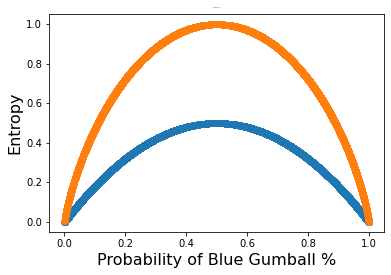

In [9]:
import math 
import random
from math import log as log
from math import e
import numpy as np
import matplotlib.pyplot as plt

ent_list  = []
gini_list = []
blue_list = []
red_list  = []
blue_prob_list = []

for x in range (10000):
    blue = random.uniform(0, 4)
    red = abs(4-blue)
    blue_list.append(blue)
    red_list.append(red)
    
    a = entropy(2,red,blue)
    ent_list.append(a)
    
    a = gini(red,blue)
    gini_list.append(a)
    
    b = blue/(blue+red)
    blue_prob_list.append(b)

plt.scatter(blue_prob_list,gini_list)
plt.scatter(blue_prob_list,ent_list)
plt.xlabel('Probability of Blue Gumball %', fontsize=16)
plt.ylabel('Entropy', fontsize=16)
plt.title('Entropy Curve', fontsize=-20)
plt.show()

Gini is blue, Entropy is orange.

# Information Gain

Information gain is why impurity is so important. Once we derive the impurity of the dataset, we can see how much information is gained as we go down the tree and measure the change in impurity by the decision.

For the information entropy:
$$
\text{Information Gain(Parent, Children)} = H(\text{Parent}) - \left [ P(C_1) H(C_1) + P(C_2) H(C_2) + \cdots \right ]
$$

For the gini index:

$$
\text{Information Gain(Parent, Children)} = \text{Gini}(\text{Parent}) - \left [ P(C_1) \text{Gini}(C_1) + P(C_2) \text{Gini}(C_2) + \cdots \right ]
$$



In [10]:
# Defining Gini info gain function:
def gini_info_gain(p_red, p_blue, child1_red, child1_blue, child2_red, child2_blue):
    return (gini(p_red,p_blue))-((child1_red+child1_blue)/(p_red+p_blue)*gini(child1_red,child1_blue) + (child2_red+child2_blue)/(p_red+p_blue)*gini(child2_red,child2_blue))

# Running Function
gini_info_gain(22,13,18,2,4,11)

0.1964625850340137

In [11]:
# Defining Entropy info gain function:
def entropy_info_gain(base, p_red, p_blue, child1_red, child1_blue, child2_red, child2_blue):
    return (entropy(base,p_red,p_blue))-((child1_red+child1_blue)/(p_red+p_blue)*entropy(base,child1_red,child1_blue) + (child2_red+child2_blue)/(p_red+p_blue)*entropy(base,child2_red,child2_blue))

# Running Function
entropy_info_gain(2,22,13,18,2,4,11)

0.3252048756090272

### Final Takeaways:
- Gini’s maximum impurity is 0.5 and maximum purity is 0
- Entropy’s maximum impurity is 1 and maximum purity is 0
- Different decision tree algorithms utilize different impurity metrics.